In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


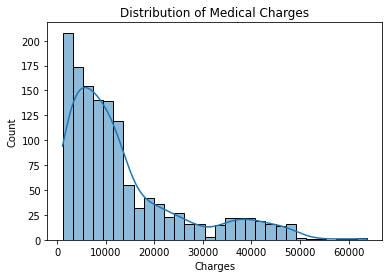

In [4]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.show()


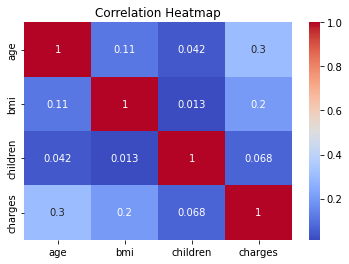

In [5]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


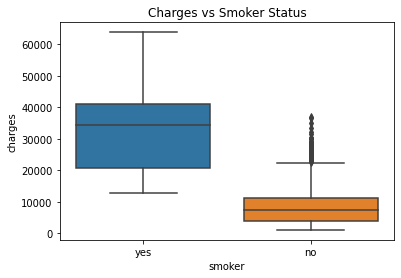

In [6]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges vs Smoker Status')
plt.show()


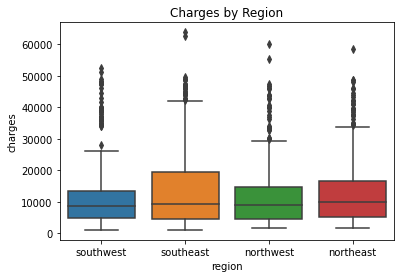

In [7]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()


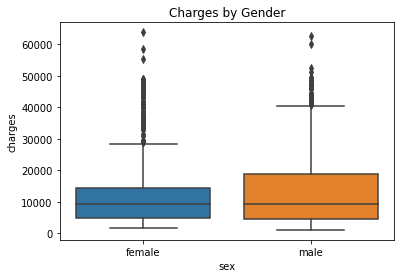

In [8]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')
plt.show()


In [9]:
# One-hot encode 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Binary encode 'sex' and 'smoker'
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Check result
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [10]:
# Define X (features) and y (target)
X = df.drop('charges', axis=1)
y = df['charges']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"✅ Linear Regression RMSE: ${rmse_lr:.2f}")
print(f"✅ Linear Regression R² Score: {r2_lr:.4f}")


✅ Linear Regression RMSE: $5796.28
✅ Linear Regression R² Score: 0.7836


In [13]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"✅ XGBoost RMSE: ${rmse_xgb:.2f}")
print(f"✅ XGBoost R² Score: {r2_xgb:.4f}")


✅ XGBoost RMSE: $4311.38
✅ XGBoost R² Score: 0.8803


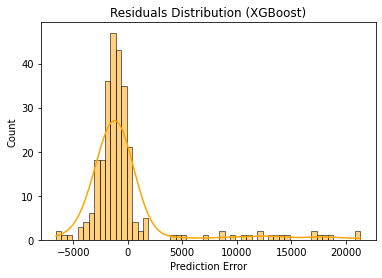

In [14]:
residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residuals Distribution (XGBoost)")
plt.xlabel("Prediction Error")
plt.show()


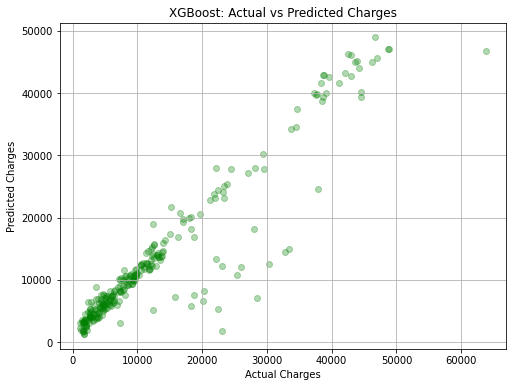

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='green')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("XGBoost: Actual vs Predicted Charges")
plt.grid(True)
plt.show()


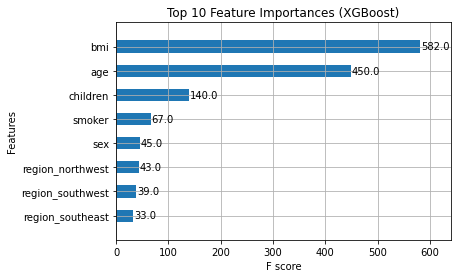

In [16]:
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()


In [17]:
import joblib
joblib.dump(xgb_model, '../models/xgb_healthcare_model.pkl')


['../models/xgb_healthcare_model.pkl']